In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Часть I

[Titanic dataset](https://www.kaggle.com/competitions/titanic/overview) — данные о пассажирах титаника

Загрузим данные

In [19]:
titanic = pd.read_csv('../../data/titanic/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Задание 1
Постройте графики распределения возвраста в зависмости от совокупности факторов:
- пол
- выжил или нет

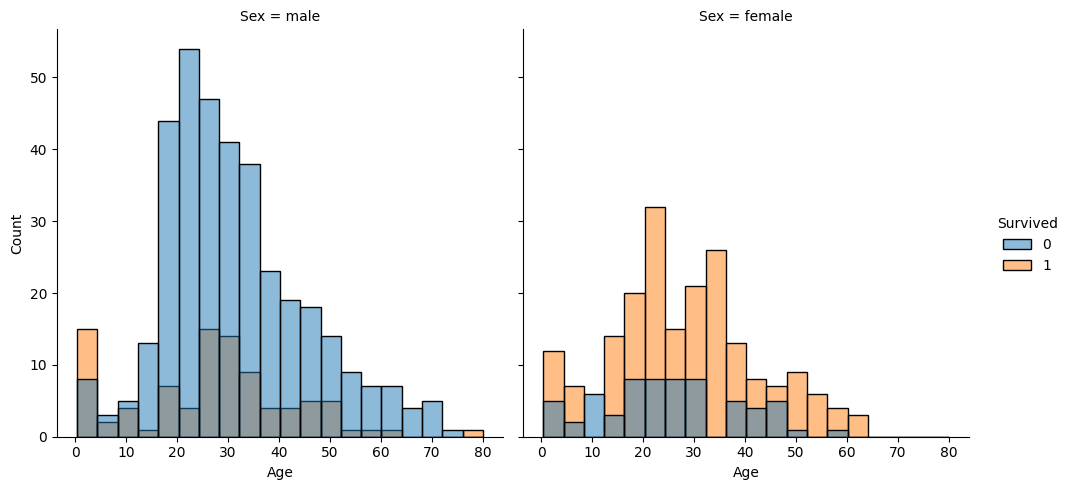

In [307]:
sns.displot(
    data=titanic,
    x='Age',
    col='Sex',
    hue='Survived'
)

#### Задание 2
Найдидте самое популярное женское имя

In [131]:
titanic.loc[titanic['Sex'] == 'female', 'Name'].str.split().str[0].value_counts().head(1)

Andersson,    6
Name: Name, dtype: int64

#### Задание 3
Сколько на Титанике было детей?

In [133]:
titanic.loc[titanic['Age'] < 18, 'PassengerId'].count()

113

#### Задание 4
Найдите и подкрепите агрументами такое правило, что
1) все удовлетворяющие ему пассаижры выжили;
2) все уодвлетворяющие ему пассажиры погибли.

Постарайтесь найти такие правила, чтобы под них попало как можно большее число пассажиров

В основном все женщины первого класса выжили, а все мужчины третьего и второго класса погибли
               Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447
На графиках видно, что на некоторых отрезках возраста либо нет выживших, либо нет погибших
Мне нужно было найти только эти большие отрезки, поэтому я немного подбирала, не осуждайте этот алгоритм, пожалуйста
Все женщины, которые ехали в первом классе, в возрасте 26 - 49 выжили, всего их 42 человек(a)
Все мужчины, которые ехали не в первом классе, в возрасте 46 - 61 погибли, всего их 23 человек(a)


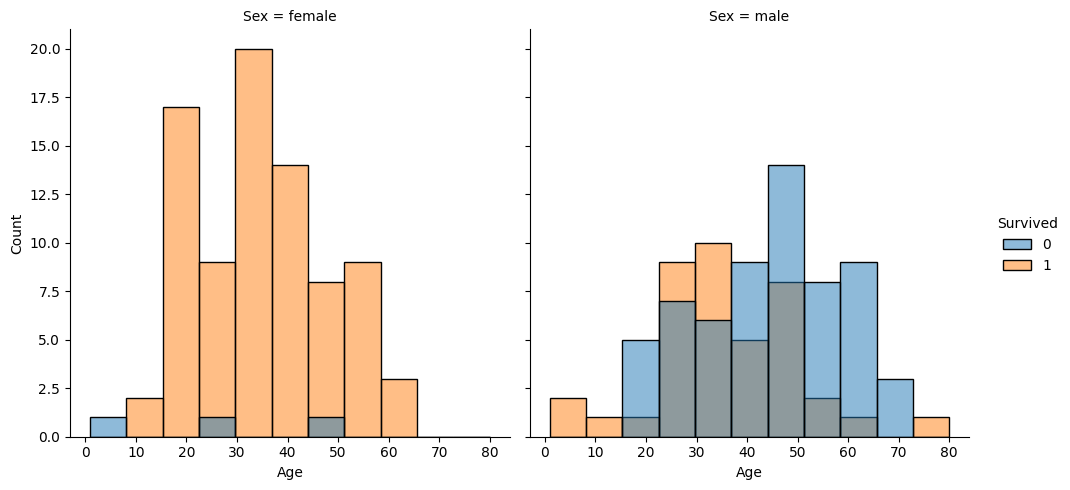

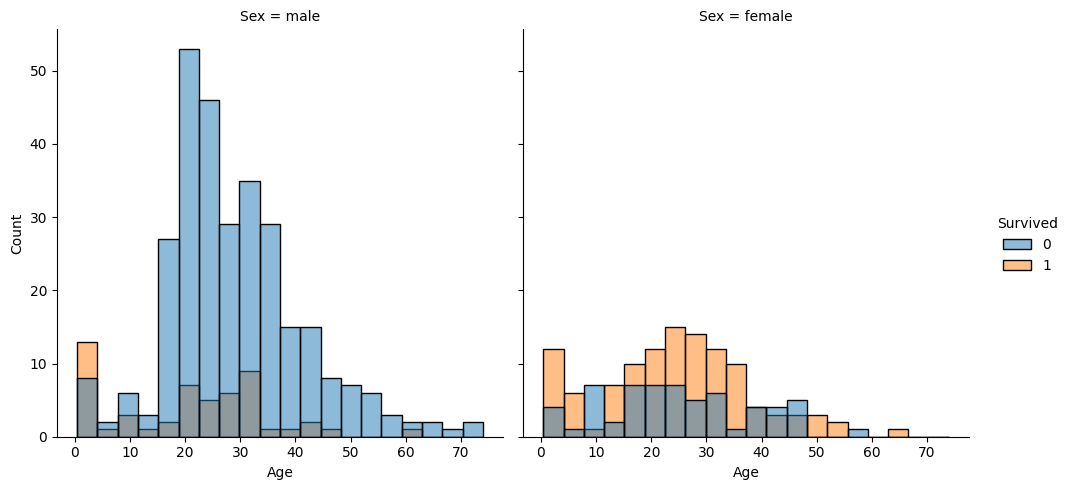

In [361]:
print("В основном все женщины первого класса выжили, а все мужчины третьего и второго класса погибли")
print(titanic.pivot_table(values=['Survived'], index=['Sex', 'Pclass'], aggfunc='mean'))

sns.displot(
    data=titanic.loc[titanic['Pclass'] == 1],
    x='Age',
    col='Sex',
    hue='Survived',

)
sns.displot(
    data=titanic.loc[titanic['Pclass'] != 1],
    x='Age',
    col='Sex',
    hue='Survived'
)
print("На графиках видно, что на некоторых отрезках возраста либо нет выживших, либо нет погибших")
print("Мне нужно было найти только эти большие отрезки, поэтому я немного подбирала, не осуждайте этот алгоритм, пожалуйста")
x = 0
count1 = 0
for i in range(25, 50):
  if (titanic[(titanic['Age'] == i) & (titanic['Sex'] == 'female')& (titanic['Pclass'] == 1)].loc[titanic['Survived']==0, 'PassengerId'].count() == 0):
      count1 += titanic[(titanic['Age'] == i) & (titanic['Sex'] == 'female')& (titanic['Pclass'] == 1)].loc[:,'PassengerId'].count()
      if (x == 0):
        x = i
      else:
        y = i
  else:
    x = 0
    count1 = 0
print(f"Все женщины, которые ехали в первом классе, в возрасте {x} - {y} выжили, всего их {count1} человек(a)")
x = 0
count1 = 0
for i in range(40, 62):
  if (titanic[(titanic['Age'] == i) & (titanic['Sex'] == 'male')& (titanic['Pclass'] != 1)].loc[titanic['Survived']==1, 'PassengerId'].count() == 0):
      count1 += titanic[(titanic['Age'] == i) & (titanic['Sex'] == 'male') & (titanic['Pclass'] != 1)].loc[:,'PassengerId'].count()
      if (x == 0):
        x = i

      else:
        y = i
  else:
    x = 0
    count1 = 0
print(f"Все мужчины, которые ехали не в первом классе, в возрасте {x} - {y} погибли, всего их {count1} человек(a)")


### Часть II

In [362]:
data = pd.read_csv('../../data/hw2.csv')

#### Задание 5
Вам необхоидмо составить и обосновать правило, которое идеально классифицирует объекты из таблицы `data`.
Класс примера находится в колонке `label`, а признаки — в колонках `x` и `y`

label = sg(x)


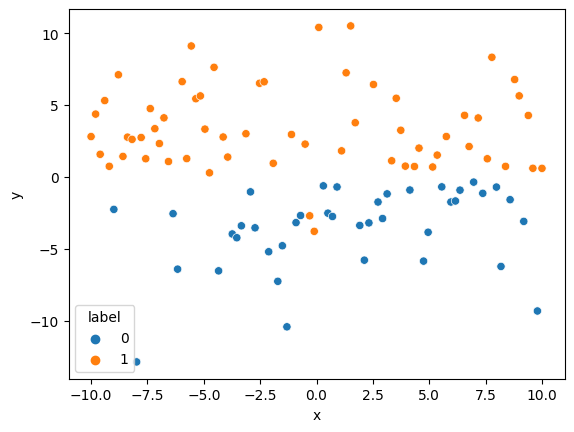

In [368]:
sns.scatterplot(
    data=data,
    x='x',
    y='y',
    hue='label'
)
print("label = sg(y)")